## Livro

Bibliotecas - Pag 15 e 16

Cookiecutter (Pag 21): https://github.com/drivendata/cookiecutter-data-science

## **Bibliotecas (Import)**


In [127]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_boston

from sklearn.model_selection import (
    train_test_split
    )

from sklearn import (
    preprocessing
    )

In [128]:
#!pip uninstall pandas-profiling
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [129]:
import warnings
warnings.filterwarnings('ignore')

## **Sobre o dataset**

 The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
 prices and the demand for clean air', J. Environ. Economics & Management,
 vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
 ...', Wiley, 1980.   N.B. Various transformations are used in the table on
 pages 244-261 of the latter.

 Variables in order:

---

 **CRIM**     per capita crime rate by town
 
---

 **ZN**     proportion of residential land zoned for lots over 25,000 sq.ft.
 
---

 **INDUS**    proportion of non-retail business acres per town
 
---

 **CHAS**     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 
---

 **NOX**      nitric oxides concentration (parts per 10 million)

---

 **RM**       average number of rooms per dwelling

---

 **AGE**      proportion of owner-occupied units built prior to 1940

---

 **DIS**      weighted distances to five Boston employment centres

---

 **RAD**     index of accessibility to radial highways

---

 **TAX**     full-value property-tax rate per $10,000

---

 **PTRATIO**  pupil-teacher ratio by town

---

 **B**        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

---

 **LSTAT**    % lower status of the population

---

 **MEDV**     Median value of owner-occupied homes in $1000's

---


## **Coleta de dados**


In [130]:
b = load_boston()

In [131]:
bos_X = pd.DataFrame(b.data, columns=b.feature_names)
bos_y = b.target

In [132]:
df = pd.concat([bos_X, pd.DataFrame(bos_y, columns=['target'])], axis=1)

In [133]:
bos_X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [134]:
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [135]:
import pandas_profiling
#pandas_profiling.ProfileReport(df)

In [136]:
from sklearn.model_selection import train_test_split
bos_X_train, bos_X_test, bos_y_train, bos_y_test = train_test_split(bos_X, bos_y, test_size=0.3, random_state=42)

In [137]:
sd = preprocessing.StandardScaler()
bos_sX = sd.fit_transform(bos_X)
bos_sX = pd.DataFrame(bos_sX, columns=bos_X.columns)

In [138]:
from sklearn.model_selection import train_test_split
bos_sX_train, bos_sX_test, bos_sy_train, bos_sy_test = train_test_split(bos_sX, bos_y, test_size=0.3, random_state=42)

Modelo base = No sklearn o resultado score é coeficiente de determinação (r² ou R²). Esse número explica o percentual de variação de dados de entrada capturado pela predição.

In [139]:
from sklearn.dummy import DummyRegressor
dr = DummyRegressor()
dr.fit(bos_X_train, bos_y_train)
dr.score(bos_X_test, bos_y_test)

-0.03469753992352409

## **Linear Regression**
**coef_** array de shape (n_features,), contendo os coeficientes (também chamados de pesos ou parâmetros) do modelo. Cada coeficiente corresponde a uma feature do modelo e determina a importância da feature para prever a variável dependente.

**intercept_** float, o intercepto (também chamado de bias ou viés) do modelo. Isso é o termo independente no modelo e representa o valor esperado da variável dependente quando todas as features são zero.

In [140]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(bos_X_train, bos_y_train)

LinearRegression()

In [141]:
lr.score(bos_X_test, bos_y_test)

0.7112260057484974

In [142]:
lr.coef_

array([-1.33470103e-01,  3.58089136e-02,  4.95226452e-02,  3.11983512e+00,
       -1.54170609e+01,  4.05719923e+00, -1.08208352e-02, -1.38599824e+00,
        2.42727340e-01, -8.70223437e-03, -9.10685208e-01,  1.17941159e-02,
       -5.47113313e-01])

Intercept positivo = a medida q o atributo aumenta o rotulo também, se for negativo é 

In [143]:
lr.intercept_

31.631084035694734

In [144]:
print('Previsão:', lr.predict(bos_X_test.iloc[[0]]))
print('Real:', bos_y_test[0])

Previsão: [28.64896005]
Real: 23.6


In [145]:
lr2 = LinearRegression()
lr2.fit(bos_sX_train, bos_sy_train)

LinearRegression()

In [146]:
lr2.score(bos_sX_test, bos_sy_test)

0.7112260057484923

In [147]:
lr2.coef_

array([-1.14691411,  0.83432605,  0.33940694,  0.79163612, -1.784727  ,
        2.84783949, -0.30429306, -2.91562521,  2.11140045, -1.46519951,
       -1.9696347 ,  1.07567771, -3.90310727])

In [148]:
print('Previsão:', lr2.predict(bos_sX_test.iloc[[0]]))
print('Real:', bos_sy_test[0])

Previsão: [28.64896005]
Real: 23.6


RM aumenta o preço; AGE e INDUS menos importa; LSTAT abaixo o preço

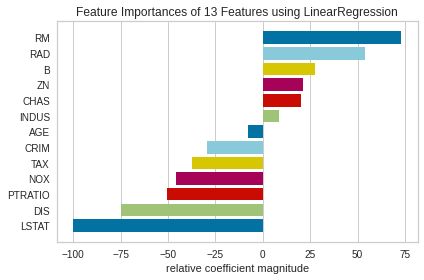

In [149]:
from yellowbrick.features import FeatureImportances
fig, ax = plt.subplots(figsize=(6,4))
fi_viz = FeatureImportances(
    lr2, labels=bos_X.columns
)
fi_viz.fit(bos_sX, bos_y)
fi_viz.poof()

## **SVMs**
Parâmetros da instância:

**C**= Quanto menor, maior estreita vai ser a fronteira de decisão (mais overfitting). Default 1.

**cache_size** = Tamanho do cache (MB). Aumentar isso pode melhorar o tempo de treinamento em grandes conjuntos de dados.

**gamma** = Valores mais altos de gamma resultam em uma maior complexidade do modelo e podem levar a um overfitting nos dados de treinamento. Isso ocorre porque o SVM vai tentar ajustar o modelo de maneira muito precisa aos dados de treinamento, o que pode ser prejudicial quando o objetivo é prever novos dados. Por outro lado, valores mais baixos de gamma resultam em um modelo mais simples e menos suscetível ao overfitting, mas também podem levar a uma menor acurácia nos dados de teste.

**kernel** = Tipo de kernel: 'linear', 'poly', 'rbf'(padrão), 'sigmoid', 'precomputed'ou uma função.


In [150]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(bos_sX_train, bos_sy_train)

SVR()

In [151]:
svr.score(bos_sX_test, bos_sy_test)

0.6551893976487937

In [152]:
svr.feature_names_in_

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype=object)

In [153]:
print('Previsão:', svr.predict(bos_sX_test.iloc[[0]]))
print('Real:', bos_sy_test[0])

Previsão: [25.78074924]
Real: 23.6


## **KNN**
**metric** = Métrica de distância. As métricas de distância incluem: 'euclidean', 'manhattan', 'chebyshev', 'minkowski', 'wminkowski', 'seuclidean', 'mahalanobis', 'haversine' , 'hamming', 'canberra', 'braycurtis', 'jaccard', 'matching', 'dice', 'rogerstanimoto', 'russellrao', 'sokalmichener', 'sokalsneath', ou um callable (definido pelo usuário).

**n_neighbors** = Número de vizinhos.

**p** = é usado para controlar a forma como a distância entre os pontos de dados é medida. Ele é definido como um valor inteiro maior ou igual a 1.

Parâmetro de potência de Minkowski: 
1 = manhattan (L1) - a soma dos valores absolutos das diferenças em cada dimensão. 
2 = Euclidiano (L2) - a distância é medida como a raiz quadrada da soma dos quadrados das diferenças em cada dimensão. 

Para valores maiores que 2, a distância é medida como a raiz p-ésima da soma dos p-ésimos poderes das diferenças em cada dimensão. Isso é conhecido como distância Lp.

**weights** = é usado para controlar a forma como os votos dos vizinhos mais próximos são contabilizados para prever a classe de um dado de entrada. Ele pode ser definido como "uniform" caso  todos os vizinhos mais próximos têm o mesmo peso na votação final. , 'distance', caso em que os pontos mais próximos têm mais influência.

In [154]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(bos_sX_train, bos_sy_train)

KNeighborsRegressor()

In [155]:
knr.score(bos_sX_test, bos_sy_test)

0.7476242635592416

In [156]:
print('Previsão:', knr.predict(bos_sX_test.iloc[[0]]))
print('Real:', bos_sy_test[0])

Previsão: [25.84]
Real: 23.6


## **Árvore de Decisão**
**max_depth**: Este parâmetro determina a profundidade máxima da árvore. Quanto maior o valor de max_depth, mais complexo é o modelo, o que pode aumentar o overfitting.

**min_samples_split**: Este parâmetro determina o número mínimo de exemplos necessários para que um nó da árvore seja dividido. Quanto maior o valor de min_samples_split, mais simples é o modelo, o que diminui a possibilidade de overfitting.

**min_samples_leaf**: Este parâmetro determina o número mínimo de exemplos que devem estar presentes em uma folha da árvore. Quanto maior o valor de min_samples_leaf, mais simples é o modelo, o que diminui a possibilidade de overfitting.

**max_features**: Este parâmetro determina o número máximo de características a serem consideradas ao dividir um nó da árvore. Quanto maior o valor de max_features, mais complexo é o modelo, o que pode aumentar o overfitting.

In [157]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(bos_sX_train, bos_sy_train)

DecisionTreeRegressor()

In [158]:
dtr.score(bos_sX_test, bos_sy_test)

0.7556496278564133

In [159]:
print('Previsão:', dtr.predict(bos_sX_test.iloc[[0]]))
print('Real:', bos_sy_test[0])

Previsão: [25.]
Real: 23.6


Muito grande

In [160]:
import pydotplus
from io import StringIO
from sklearn.tree import export_graphviz
dot_data = StringIO()

export_graphviz(
    dtr,
    out_file=dot_data,
    feature_names=bos_X.columns,
    filled=True,
)
g = pydotplus.graph_from_dot_data(
    dot_data.getvalue()
)

from IPython.display import Image
Image(g.create_png())

Output hidden; open in https://colab.research.google.com to view.

Os dois primeiros níveis da árvore

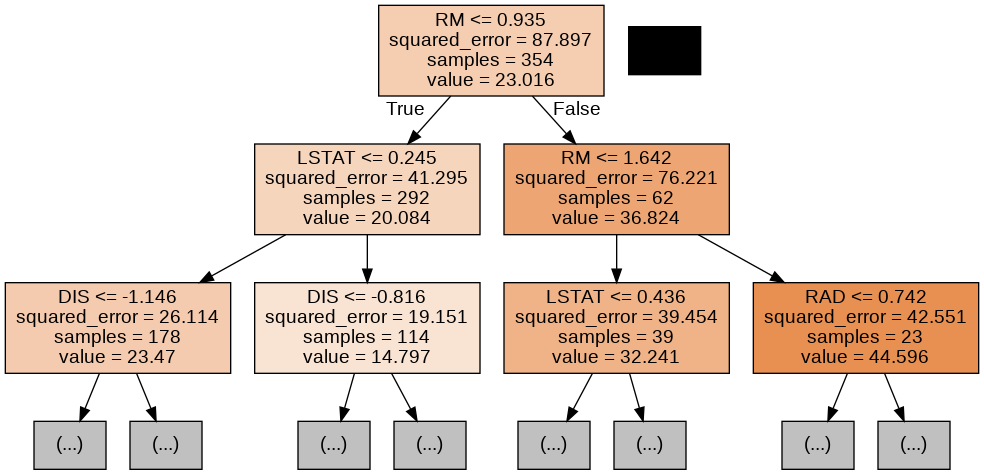

In [161]:
dot_data = StringIO()

export_graphviz(
    dtr,
    max_depth=2,
    out_file=dot_data,
    feature_names=bos_X.columns,
    filled=True,
)

g = pydotplus.graph_from_dot_data(
    dot_data.getvalue()
)

from IPython.display import Image
Image(g.create_png())

In [162]:
#!pip install -q dtreeviz 

In [163]:
# import dtreeviz

# dtr3 = DecisionTreeRegressor(max_depth=2)
# dtr3.fit(bos_sX_train, bos_sy_train)

# viz = dtreeviz.model(
#     dtr3,
#     bos_X,
#     bos_y,
#     target_name="price",
#     feature_names=bos_X.columns
# )
# viz.view()

In [164]:
for col, val in sorted(
    zip(bos_X.columns, dtr.feature_importances_),
    key=lambda x: x[1],
    reverse=True,
)[:5]:
    print(f"{col:10}{val:10.3f}")

RM             0.575
LSTAT          0.213
DIS            0.110
CRIM           0.025
B              0.021


## **Floresta Aleatória**
**n_estimators**: Este parâmetro determina o número de árvores na floresta. Quanto maior o valor de n_estimators, mais complexo é o modelo, o que pode aumentar o tempo de treinamento e de previsão, mas também pode melhorar o desempenho do modelo.

**max_depth**: Este parâmetro determina a profundidade máxima das árvores na floresta. Quanto maior o valor de max_depth, mais complexo é o modelo, o que pode aumentar o overfitting.

**min_samples_split**: Este parâmetro determina o número mínimo de exemplos necessários para que um nó da árvore seja dividido. Quanto maior o valor de min_samples_split, mais simples é o modelo, o que diminui a possibilidade de overfitting.

**min_samples_leaf**: Este parâmetro determina o número mínimo de exemplos que devem estar presentes em uma folha da árvore. Quanto maior o valor de min_samples_leaf, mais simples é o modelo, o que diminui a possibilidade de overfitting.

**max_features**: Este parâmetro determina o número máximo de características a serem consideradas ao dividir um nó da árvore. Quanto maior o valor de max_features, mais complexo é o modelo, o que pode aumentar o overfitting.

In [165]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(bos_sX_train, bos_sy_train)

RandomForestRegressor()

In [166]:
rfr.score(bos_sX_test, bos_sy_test)

0.8719277301504291

In [167]:
print('Previsão:', rfr.predict(bos_sX_test.iloc[[0]]))
print('Real:', bos_sy_test[0])

Previsão: [22.932]
Real: 23.6


In [168]:
for col, val in sorted(
    zip(bos_X.columns, rfr.feature_importances_),
    key=lambda x: x[1],
    reverse=True,
)[:5]:
    print(f"{col:10}{val:10.3f}")

RM             0.410
LSTAT          0.409
DIS            0.058
CRIM           0.034
PTRATIO        0.019


## **Regressão XGBoost**

**max_depth** = profundidade máxima da árvore. Valores maiores podem levar a modelos mais complexos e melhor ajuste aos dados, mas também podem aumentar o risco de overfitting. Default 3.

**learning_rate or eta** = taxa de aprendizado utilizada para ajustar os pesos dos modelos na sequência de árvores. Ele é usado para determinar o quão rapidamente o modelo deve aprender a partir dos dados de treinamento. É importante notar que o learning_rate é um hiperparâmetro que afeta diretamente o desempenho do modelo XGBoost. Portanto, é importante experimentar diferentes valores de learning_rate e escolher o que melhor se ajusta aos seus dados e problema específicos. Default 0.1.

**n_estimators** = número de árvores a serem construídas na sequência. Valores maiores podem levar a modelos mais precisos, mas também podem aumentar o tempo de treinamento e a complexidade do modelo. Default 100.

**subsample**= proporção da amostra de treinamento usada para treinar cada árvore. Valores mais baixos podem ajudar a reduzir o overfitting e aumentar a velocidade do treinamento. Default 1.

**colsample_bytree** = proporção de colunas de dados usadas para construir cada árvore. Valores mais baixos podem ajudar a reduzir o overfitting e aumentar a velocidade do treinamento. Default 1.

**gamma** =  Ele é usado para controlar a quantidade de informação que uma árvore de decisão pode absorver a partir dos dados de treinamento. Valores mais altos de gamma significam que as árvores só podem absorver muito pouca informação dos dados de treinamento, o que pode levar a modelos mais simples e menos propensos ao overfitting. Valores mais baixos de gamma significam que as árvores podem absorver mais informação dos dados de treinamento, o que pode levar a modelos mais complexos e melhor ajuste aos dados, mas também pode aumentar o risco de overfitting Default 0.
 
**min_child_weight**= Quando o min_child_weight é um valor alto, as árvores de decisão são forçadas a ter nós folha com um número maior de exemplos de treinamento. Isso pode levar a modelos mais simples e menos propensos ao overfitting. Valores mais baixos de min_child_weight permitem que as árvores fiquem mais complexas e se ajustem melhor aos dados, mas também aumentam o risco de overfitting. Default 1.

In [169]:
import xgboost as xgb
xgr = xgb.XGBRegressor(random_state=42)
xgr.fit(
    bos_sX_train,
    bos_sy_train
)

[00:14:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(random_state=42)

In [170]:
xgr.score(bos_sX_test, bos_sy_test)

0.8716794731224718

In [171]:
print('Previsão:', xgr.predict(bos_sX_test.iloc[[0]]))
print('Real:', bos_sy_test[0])

Previsão: [23.496954]
Real: 23.6


Importância dos atributos usando peso (quantas vezes um atributo é divido nas árvores)

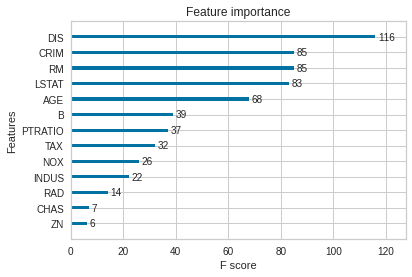

In [172]:
fig, ax = plt.subplots(figsize=(6, 4))
xgb.plot_importance(xgr, ax=ax)

Importância do recurso Yellowbrick para XGBoost (normalizado para 100).

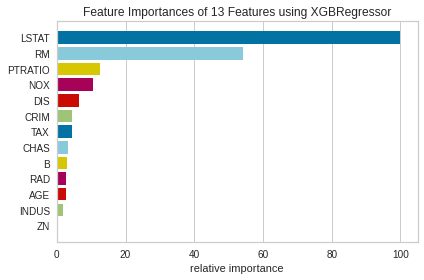

In [173]:
fig, ax = plt.subplots(figsize=(6, 4))
fi_viz = FeatureImportances(xgr)
fi_viz.fit(bos_X_train, bos_y_train)
fi_viz.poof()

In [174]:
booster = xgr.get_booster()
print(booster.get_dump()[0])

0:[LSTAT<-0.671160936] yes=1,no=2,missing=1
	1:[RM<1.64172769] yes=3,no=4,missing=3
		3:[RM<0.52978158] yes=7,no=8,missing=7
			7:leaf=2.42512202
			8:leaf=3.10899997
		4:[CRIM<-0.101394668] yes=9,no=10,missing=9
			9:leaf=4.31652212
			10:leaf=1.07000005
	2:[LSTAT<0.481067568] yes=5,no=6,missing=5
		5:[B<-3.38742781] yes=11,no=12,missing=11
			11:leaf=0.86499995
			12:leaf=2.11871624
		6:[DIS<-0.881830096] yes=13,no=14,missing=13
			13:leaf=1.06833339
			14:leaf=1.57500005



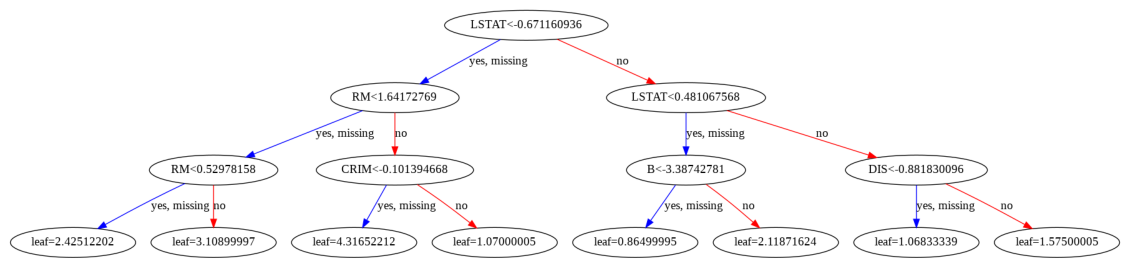

In [175]:
fig, ax = plt.subplots(figsize=(20, 20))
xgb.plot_tree(xgr, ax=ax, num_trees=0)

## **Regressão LightGBM**

In [176]:
import lightgbm as lgb
lgr = lgb.LGBMRegressor(random_state=42)
lgr.fit(bos_sX_train, bos_sy_train)

LGBMRegressor(random_state=42)

In [177]:
lgr.score(bos_sX_test, bos_sy_test)

0.8424447756187686

In [178]:
print('Previsão:', lgr.predict(bos_sX_test.iloc[[0]]))
print('Real:', bos_sy_test[0])

Previsão: [25.12123908]
Real: 23.6


In [179]:
for col, val in sorted(
    zip(bos_X.columns, lgr.feature_importances_),
    key=lambda x: x[1],
    reverse=True,
)[:5]:
    print(f"{col:10}{val:10.3f}")

LSTAT        233.000
RM           195.000
DIS          177.000
CRIM         134.000
AGE          125.000


Importância dos atributos usando peso (quantas vezes um atributo é divido nas árvores)

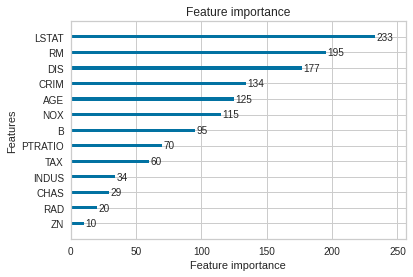

In [180]:
fig, ax = plt.subplots(figsize=(6, 4))
lgb.plot_importance(lgr, ax=ax)